#Rose

In [ ]:
df1= pd.read_csv('/content/Rose.csv')
df1.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [ ]:
df1.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [ ]:
df1['Time_Stamp'] = pd.DataFrame(date)
df1.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [ ]:
df1.set_index('Time_Stamp',inplace=True)
df1.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [ ]:
df1.tail()

YearMonth  Rose
Time_Stamp                
1995-03-31   1995-03  45.0
1995-04-30   1995-04  52.0
1995-05-31   1995-05  28.0
1995-06-30   1995-06  40.0
1995-07-31   1995-07  62.0

In [ ]:
df1.drop("YearMonth", inplace=True, axis=1)

In [ ]:
df1

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

In [ ]:
df1.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

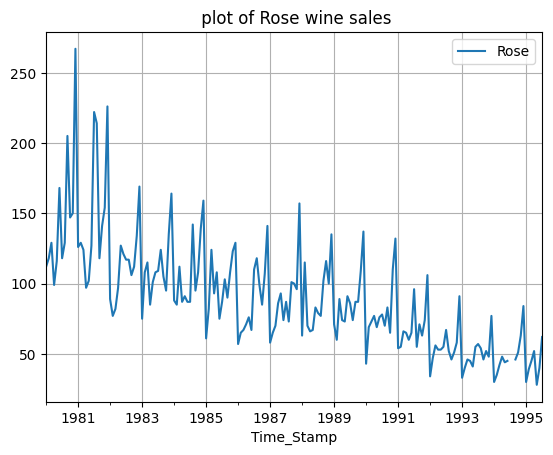

In [ ]:
df1.plot()
plt.title(" plot of Rose wine sales")
plt.grid();

##2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [ ]:
print("Shape of dataset is:",df1.shape)

Shape of dataset is: (187, 1)


In [ ]:
print("Number of missing values :",df1.isnull().sum().sum())

Number of missing values : 2


In [ ]:
print("Missing records in the Rose data:\n",df1[df1['Rose'].isnull()])

Missing records in the Rose data:
             Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN


In [ ]:
df1.interpolate(method='linear')['1994'].round(2).tail(7)

<ipython-input-322-fe2aebb8574f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df1.interpolate(method='linear')['1994'].round(2).tail(7)


Rose
Time_Stamp       
1994-06-30  45.00
1994-07-31  45.33
1994-08-31  45.67
1994-09-30  46.00
1994-10-31  51.00
1994-11-30  63.00
1994-12-31  84.00

In [ ]:
df1.loc['1994-07-31'].replace(to_replace= np.NaN, value= 45.33, inplace=True)
df1.loc['1994-08-31'].replace(to_replace= np.NaN, value= 45.67, inplace=True)

In [ ]:
df1.loc['1994-07-31']

Rose    45.33
Name: 1994-07-31 00:00:00, dtype: float64

In [ ]:
print("Number of missing values in data after imputation:",df1.isnull().sum().sum())

Number of missing values in data after imputation: 0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [ ]:
df1.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

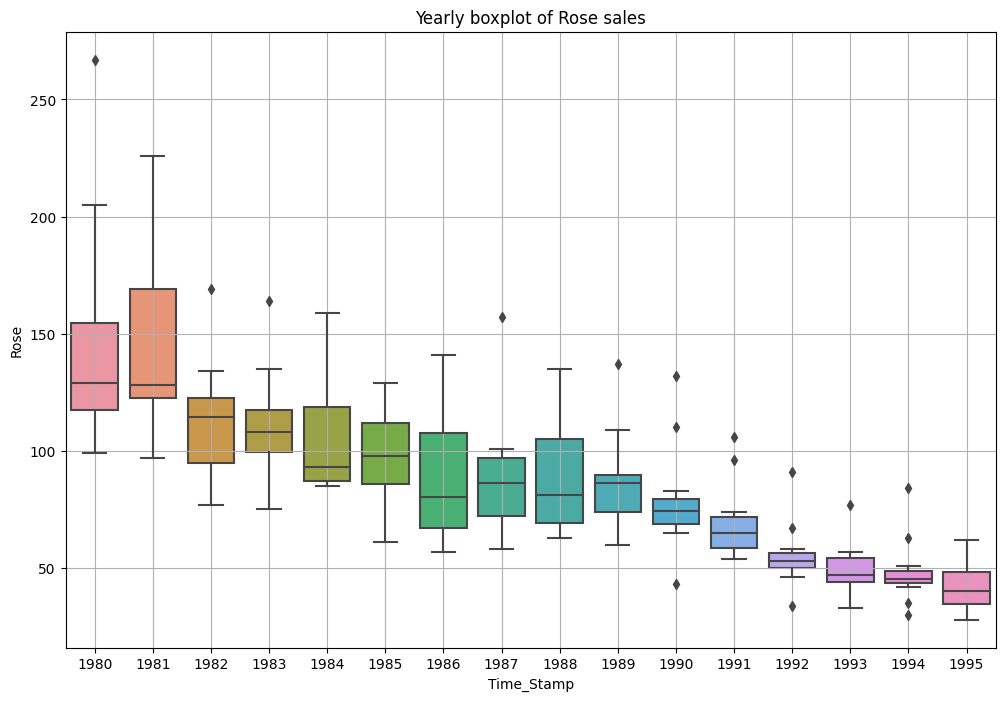

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df1.index.year,y = df1['Rose'])
plt.title("Yearly boxplot of Rose sales")
plt.grid();

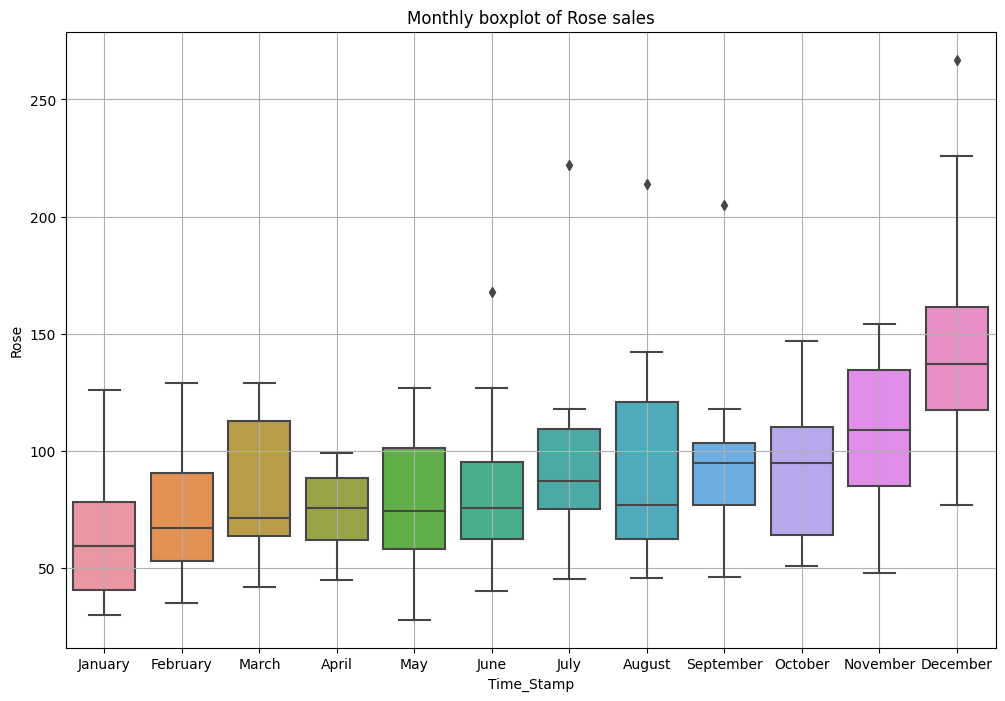

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df1.index.month_name(),y = df1['Rose'])
plt.title("Monthly boxplot of Rose sales")
plt.grid();

In [ ]:
df1copy = df1.copy()
df1copy['Year']=df1.index.year
df1copy['Month']=df1.index.month
df1copy.head()

Rose  Year  Month
Time_Stamp                    
1980-01-31  112.0  1980      1
1980-02-29  118.0  1980      2
1980-03-31  129.0  1980      3
1980-04-30   99.0  1980      4
1980-05-31  116.0  1980      5

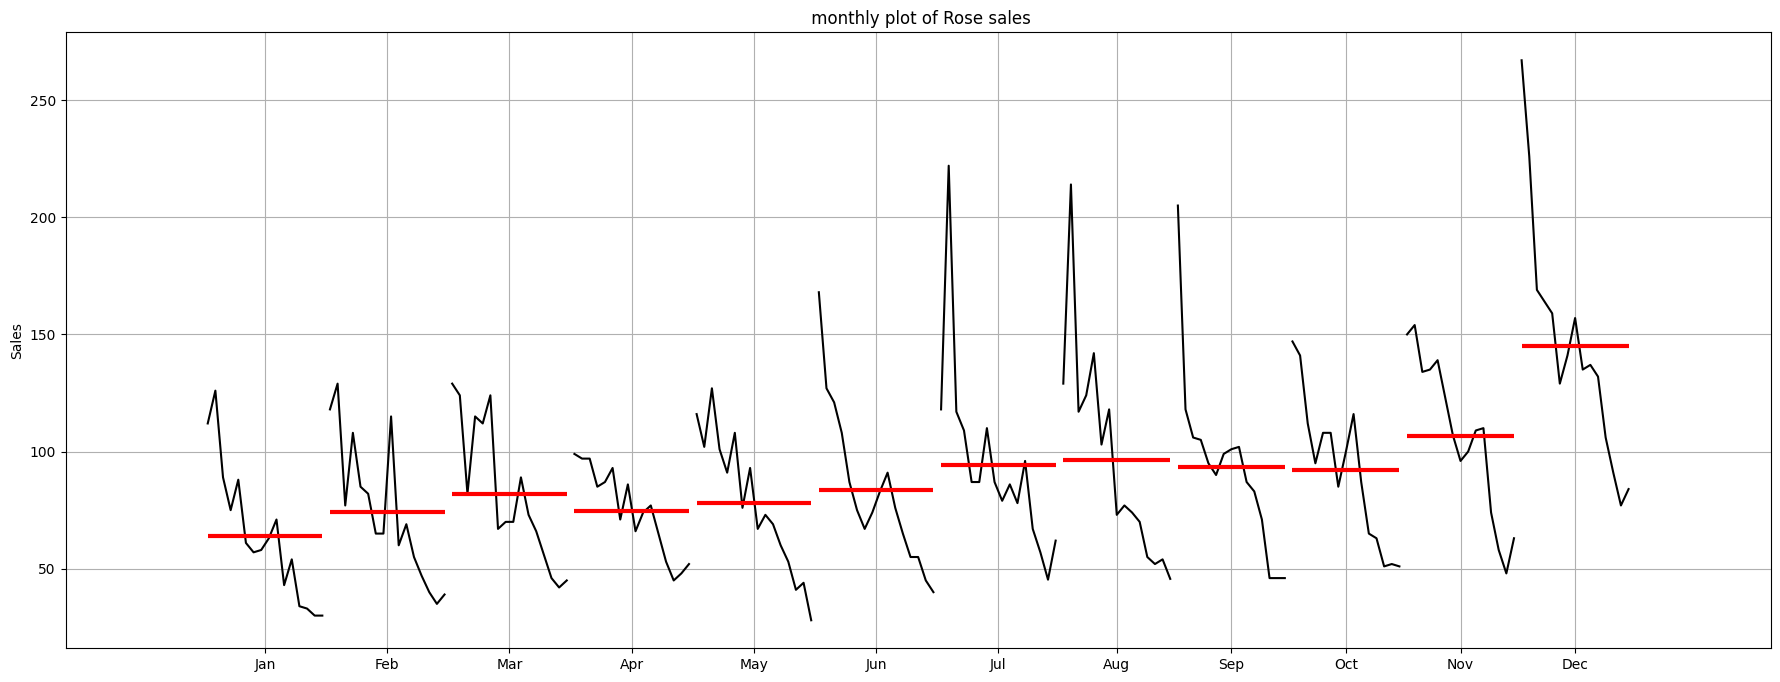

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1['Rose'],ylabel='Sales',ax=ax)
plt.title(" monthly plot of Rose sales")
plt.grid();

In [ ]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month, index = df1.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6       7       8      9   \
Time_Stamp                                                                   
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.00  129.00  205.0   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.00  214.00  118.0   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.00  117.00  106.0   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.00  124.00  105.0   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.00  142.00   95.0   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.00  103.00   90.0   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.00  118.00   99.0   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.00   73.00  101.0   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.00   77.00  102.0   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.00   74.00   87.0   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.00   70.00   83.0   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.00   55.00   71.0   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.00   52.00   46.0   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.00   54.00   46.0   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.33   45.67   46.0   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.00     NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        147.0  150.0  267.0  
1981        141.0  154.0  226.0  
1982        112.0  134.0  169.0  
1983         95.0  135.0  164.0  
1984        108.0  139.0  159.0  
1985        108.0  123.0  129.0  
1986         85.0  107.0  141.0  
1987        100.0   96.0  157.0  
1988        116.0  100.0  135.0  
1989         87.0  109.0  137.0  
1990         65.0  110.0  132.0  
1991         63.0   74.0  106.0  
1992         51.0   58.0   91.0  
1993         52.0   48.0   77.0  
1994         51.0   63.0   84.0  
1995          NaN    NaN    NaN

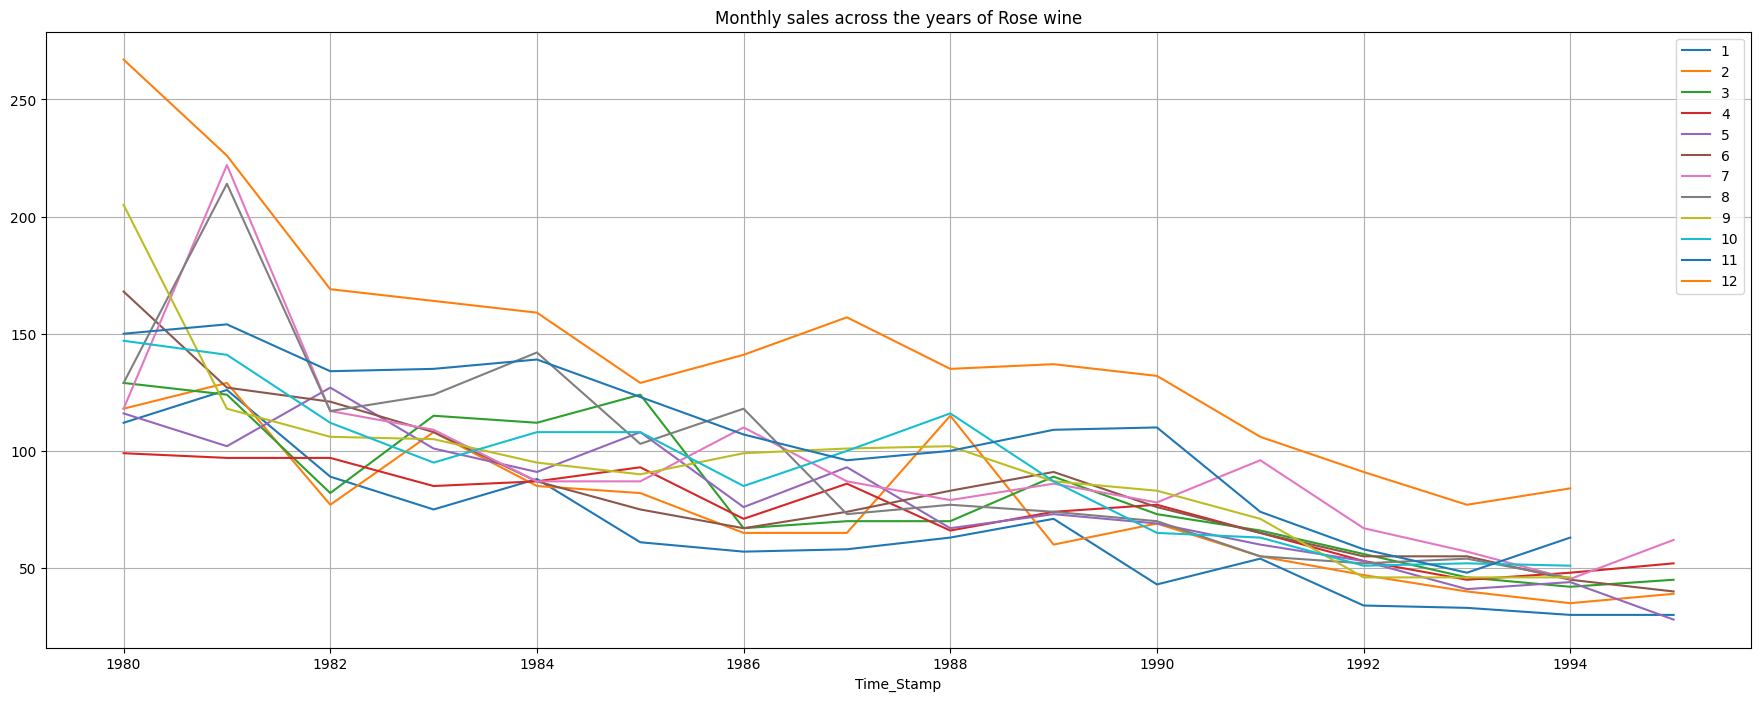

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))

monthly_sales_across_years.plot(ax=ax)

plt.grid()
plt.title("Monthly sales across the years of Rose wine")
plt.legend(loc='best');

In [ ]:
yearly_sales_across_months = pd.pivot_table(df1, values = 'Rose', columns = df1.index.year, index = df1.index.month)
yearly_sales_across_months

Time_Stamp   1980   1981   1982   1983   1984   1985   1986   1987   1988  \
Time_Stamp                                                                  
1           112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   
2           118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   
3           129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   
4            99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   
5           116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   
6           168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   
7           118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   
8           129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   
9           205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   
10          147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   
11          150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0   
12          267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0   

Time_Stamp   1989   1990   1991  1992  1993   1994  1995  
Time_Stamp                                                
1            71.0   43.0   54.0  34.0  33.0  30.00  30.0  
2            60.0   69.0   55.0  47.0  40.0  35.00  39.0  
3            89.0   73.0   66.0  56.0  46.0  42.00  45.0  
4            74.0   77.0   65.0  53.0  45.0  48.00  52.0  
5            73.0   69.0   60.0  53.0  41.0  44.00  28.0  
6            91.0   76.0   65.0  55.0  55.0  45.00  40.0  
7            86.0   78.0   96.0  67.0  57.0  45.33  62.0  
8            74.0   70.0   55.0  52.0  54.0  45.67   NaN  
9            87.0   83.0   71.0  46.0  46.0  46.00   NaN  
10           87.0   65.0   63.0  51.0  52.0  51.00   NaN  
11          109.0  110.0   74.0  58.0  48.0  63.00   NaN  
12          137.0  132.0  106.0  91.0  77.0  84.00   NaN

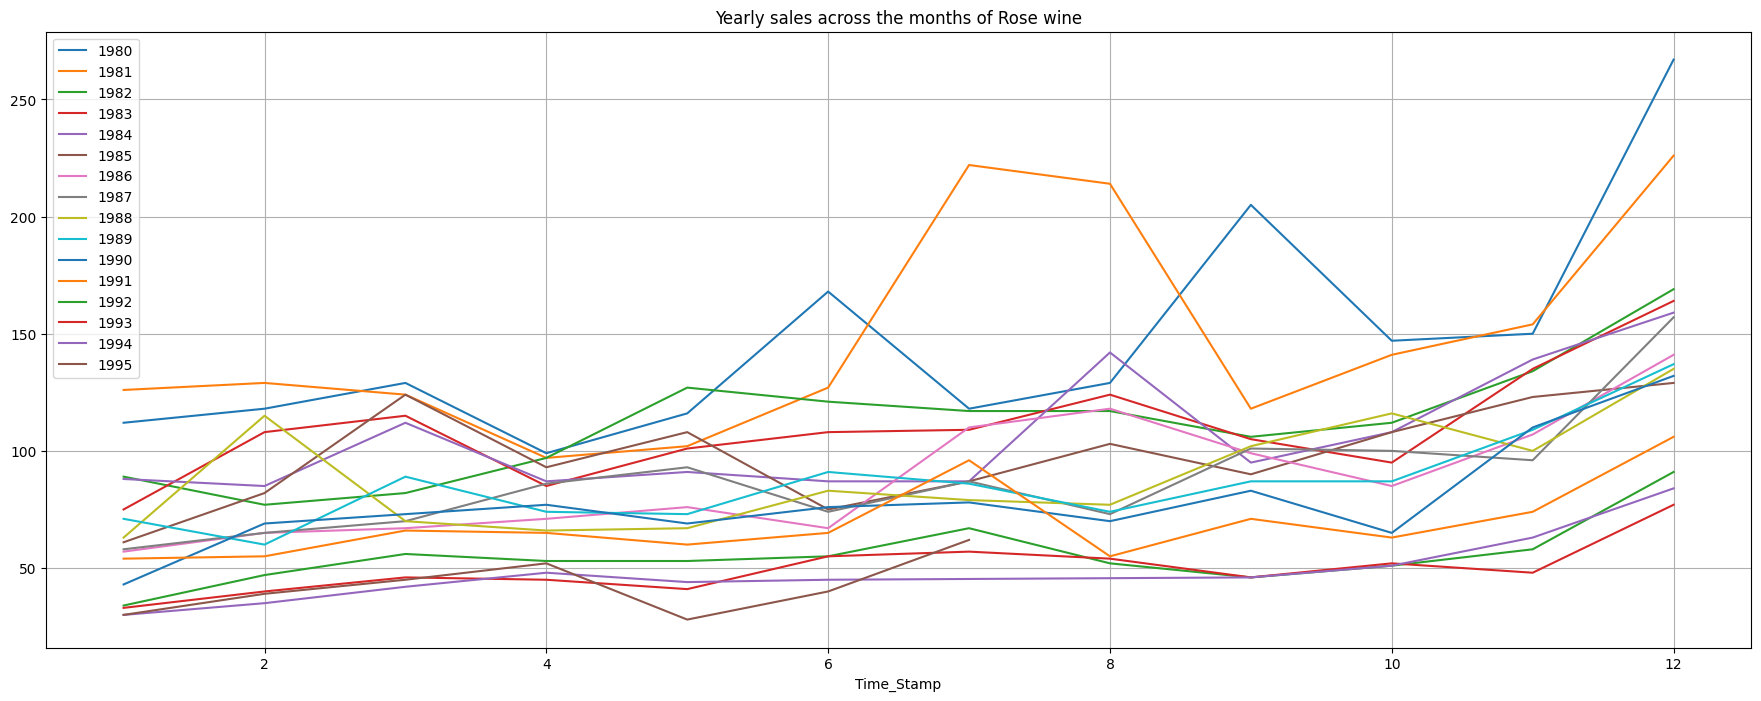

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
yearly_sales_across_months.plot(ax=ax)

plt.grid()
plt.title("Yearly sales across the months of Rose wine")
plt.legend(loc='upper left');

###Resampling - yearly plot

In [ ]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

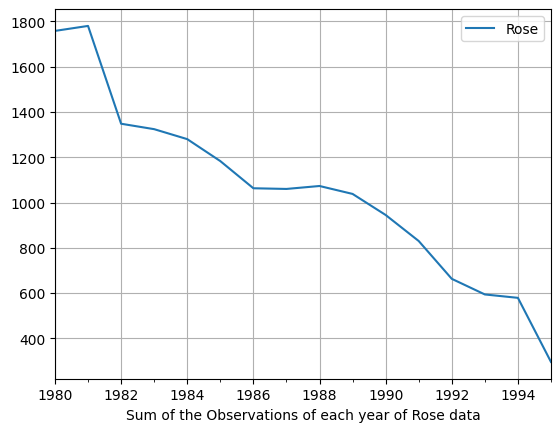

In [ ]:
df1_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year of Rose data');

In [ ]:
df1_yearly_mean = df1.resample('Y').mean().round(2)
df1_yearly_mean.head()

Rose
Time_Stamp        
1980-12-31  146.50
1981-12-31  148.33
1982-12-31  112.33
1983-12-31  110.33
1984-12-31  106.67

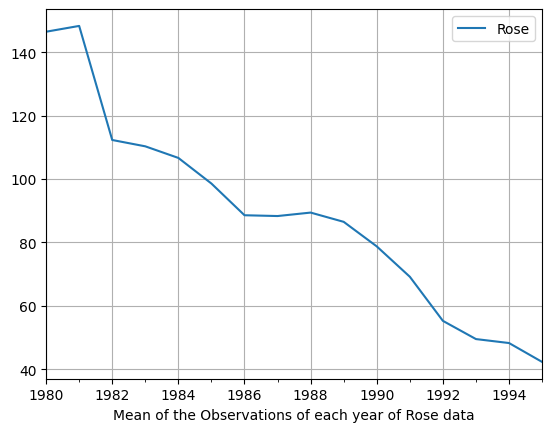

In [ ]:
df1_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year of Rose data');

###Resampling - quarterly plot

In [ ]:
df1_quarterly_sum = df1.resample('Q').sum()
df1_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

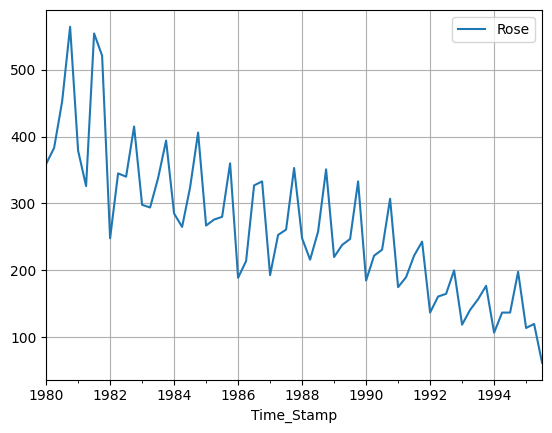

In [ ]:
df1_quarterly_sum.plot();
plt.grid()

In [ ]:
df1_quarterly_mean = df1.resample('Q').mean()
df1_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

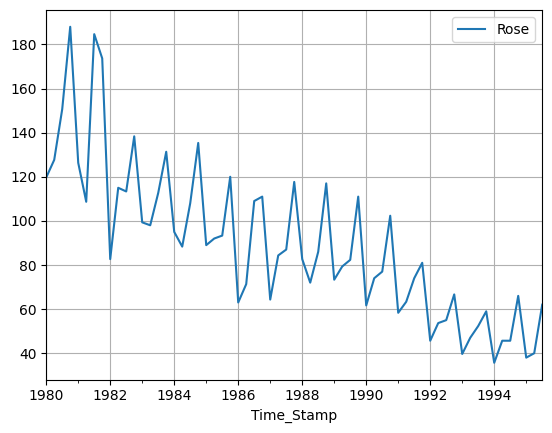

In [ ]:
df1_quarterly_mean.plot();
plt.grid()

###Resampling - daily plot

In [ ]:
df1_daily_sum = df1.resample('D').sum()
df1_daily_sum

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-01    0.0
1980-02-02    0.0
1980-02-03    0.0
1980-02-04    0.0
...           ...
1995-07-27    0.0
1995-07-28    0.0
1995-07-29    0.0
1995-07-30    0.0
1995-07-31   62.0

[5661 rows x 1 columns]

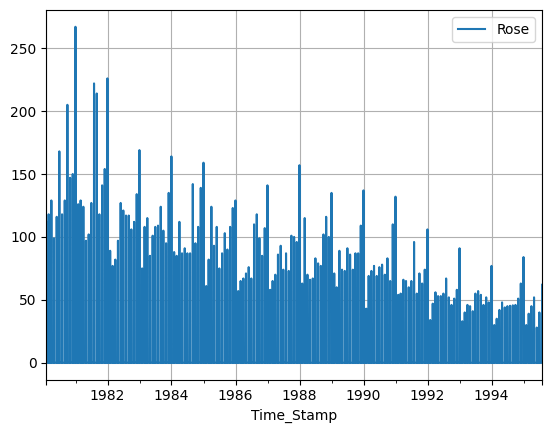

In [ ]:
df1_daily_sum.plot()
plt.grid();

###Decompose the time series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

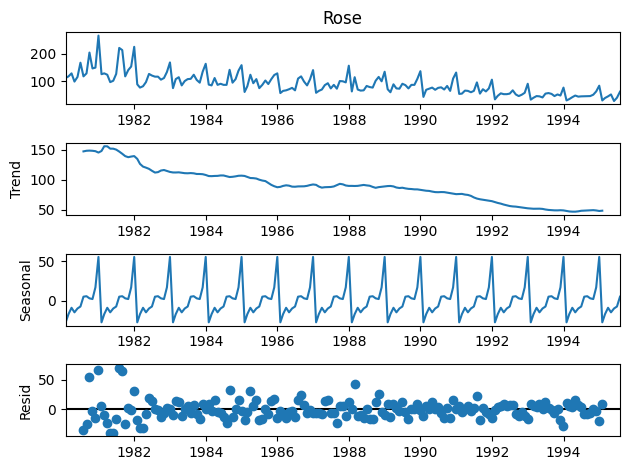

In [ ]:
decomposition_1 = seasonal_decompose(df1['Rose'],model='additive')
decomposition_1.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

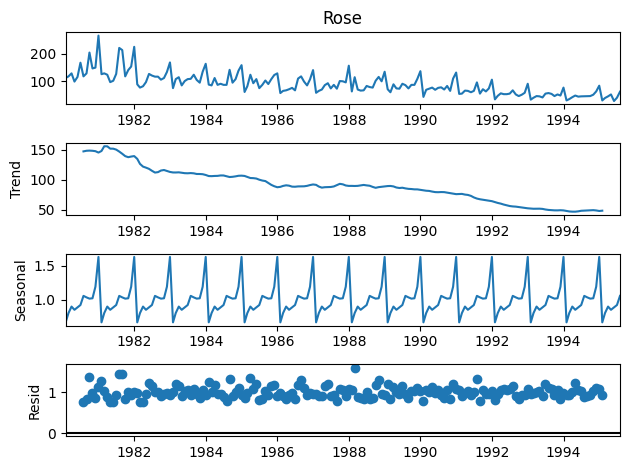

In [ ]:
decomposition_2 = seasonal_decompose(df1['Rose'],model='multiplicative')
decomposition_2.plot();



*   For the multiplicative series, we see that a lot of residuals are located around 1. Thus Multiplicative Decomposition is the right way to decompose the time series
*   Also it is evident that there is a 6 month seasonality in the data from the above plots



In [ ]:
trend_df1 = decomposition_2.trend
seasonality_df1 = decomposition_2.seasonal
residual_df1 = decomposition_2.resid

print('Trend','\n',trend_df1.head(12),'\n')
print('Seasonality','\n',seasonality_df1.head(12),'\n')
print('Residual','\n',residual_df1.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806164
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058034
1980-08-31    1.035886
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758262
1980-08-31    0.840716
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

In [ ]:
deaseasonalized_ts_df2 = trend_df1 + residual_df1
deaseasonalized_ts_df2.round(2).head(12)

Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.84
1980-08-31    148.97
1980-09-30    149.73
1980-10-31    149.05
1980-11-30    148.27
1980-12-31    146.25
dtype: float64

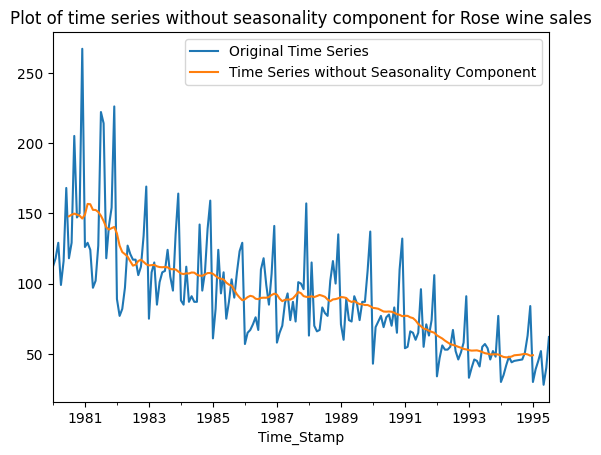

In [ ]:
df1.plot()
deaseasonalized_ts_df2.plot()
plt.title("Plot of time series without seasonality component for Rose wine sales")
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

##3. Split the data into training and test. The test data should start in 1991.

In [ ]:
train_df1=df1[df1.index.year < 1991]
test_df1=df1[df1.index.year >= 1991]

In [ ]:
from IPython.display import display
print('First few rows of Training Data')
display(train_df1.head())
print('Last few rows of Training Data')
display(train_df1.tail())
print('First few rows of Test Data')
display(test_df1.head())
print('Last few rows of Test Data')
display(test_df1.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [ ]:
print("Shape of train set in Rose dataset:",train_df1.shape)
print("Shape of test set in Rose dataset:",test_df1.shape)

Shape of train set in Rose dataset: (132, 1)
Shape of test set in Rose dataset: (55, 1)


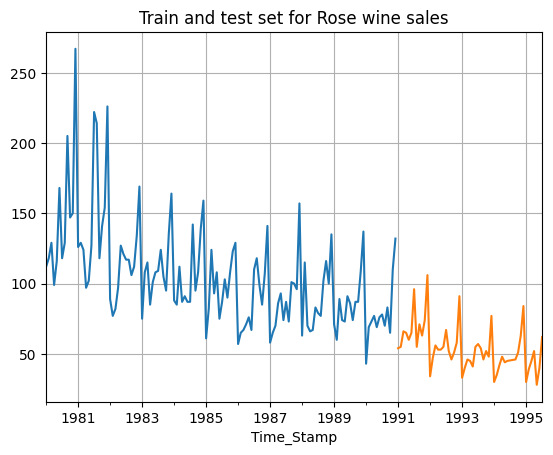

In [ ]:
train_df1['Rose'].plot()
test_df1['Rose'].plot()
plt.grid()
plt.title("Train and test set for Rose wine sales");

##4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

###1.Linear Regression


For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [ ]:
train_time_df1 = [i+1 for i in range(len(train_df1))]
test_time_df1 = [i+133 for i in range(len(test_df1))]
print("Train time instance:\n", train_time_df1)
print("Test time instance:\n",test_time_df1)

Train time instance:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test time instance:
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [ ]:
LinearReg_train_df1 = train_df1.copy()
LinearReg_test_df1 = test_df1.copy()

In [ ]:
LinearReg_train_df1['Time'] = train_time_df1
LinearReg_test_df1['Time'] = test_time_df1

print('First few rows of Training Data','\n',LinearReg_train_df1.head(),'\n')
print('Last few rows of Training Data','\n',LinearReg_train_df1.tail(),'\n')
print('First few rows of Test Data','\n',LinearReg_test_df1.head(),'\n')
print('Last few rows of Test Data','\n',LinearReg_test_df1.tail(),'\n')

First few rows of Training Data 
              Rose  Time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  Time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  Time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  Time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



The train and test set has been modified. Hence the Linear Regression can be used to build the model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearReg_train_df1[['Time']], LinearReg_train_df1['Rose'].values)

LinearRegression()

In [ ]:
test_prediction_model_df1 = lr.predict(LinearReg_test_df1[['Time']])
LinearReg_test_df1['RegOnTime'] = test_prediction_model_df1

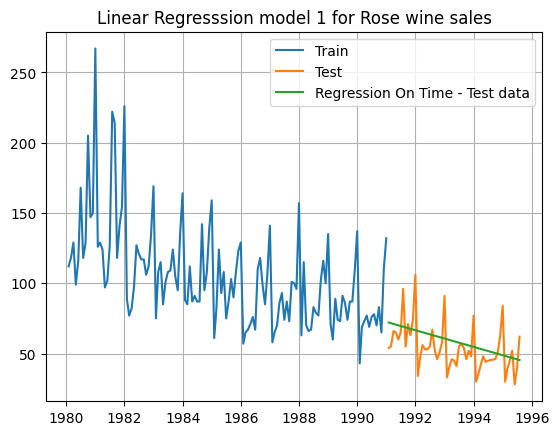

In [ ]:
plt.plot(train_df1['Rose'],label='Train')
plt.plot(test_df1['Rose'],label='Test')
plt.plot(LinearReg_test_df1['RegOnTime'], label='Regression On Time - Test data')
plt.grid()
plt.legend(loc='best')
plt.title("Linear Regresssion model 1 for Rose wine sales");

Model evaluation

In [ ]:
from sklearn import metrics

In [ ]:
rmse_model_df1_test = metrics.mean_squared_error(test_df1['Rose'],test_prediction_model_df1, squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %.2f" %rmse_model_df1_test)

For RegressionOnTime forecast on the Test Data,  RMSE is 15.27


In [ ]:
results_df1 = pd.DataFrame({'Test RMSE': [rmse_model_df1_test]},index=['RegresionOnTime'])
results_df1

Test RMSE
RegresionOnTime  15.268958

###2.Naive model

In [ ]:
naive_test_df1 = test_df1.copy()
naive_train_df1 = train_df1.copy()
naive_train_df1.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

We will pick the last value from the train set "132" and use it as forecast for the test set.

In [ ]:
naive_train_df1.shape

(132, 1)

In [ ]:
train_shape_df1 = naive_train_df1.shape[0]
train_shape_df1

132

In [ ]:
naive_test_df1['predict'] = naive_train_df1['Rose'][train_shape_df1-1]

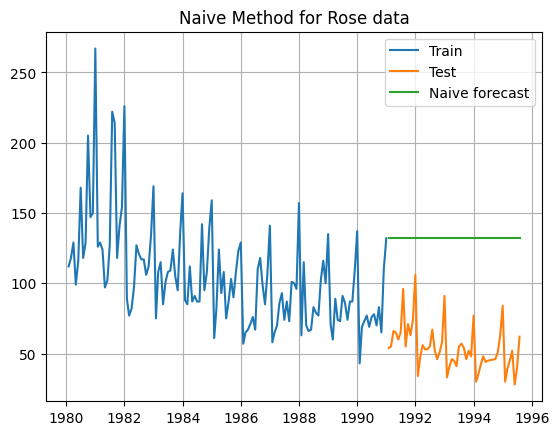

In [ ]:
plt.grid()
plt.plot(train_df1['Rose'], label='Train')
plt.plot(test_df1['Rose'], label='Test')
plt.plot(naive_test_df1['predict'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method for Rose data')
plt.show()

In [ ]:
rmse_rose = metrics.mean_squared_error(test_df1['Rose'],naive_test_df1['predict'],squared=False)
print("For Naive forecast on the Test Data for Rose wine,  RMSE is %.2f" %(rmse_rose))

For Naive forecast on the Test Data for Rose wine,  RMSE is 79.72


In [ ]:
results_naive_rose = pd.DataFrame({'Test RMSE': [rmse_rose]},index=['NaiveForecast'])
results_df1= pd.concat([results_df1,results_naive_rose])
results_df1

Test RMSE
RegresionOnTime  15.268958
NaiveForecast    79.718774

###3.Simple average

In [ ]:
avg_test_df1 = test_df1.copy()
avg_train_df1 = train_df1.copy()
avg_train_df1.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [ ]:
avg_train_df1['Rose'].mean()

104.93939393939394

In [ ]:
avg_test_df1['predict'] = avg_train_df1['Rose'].mean()

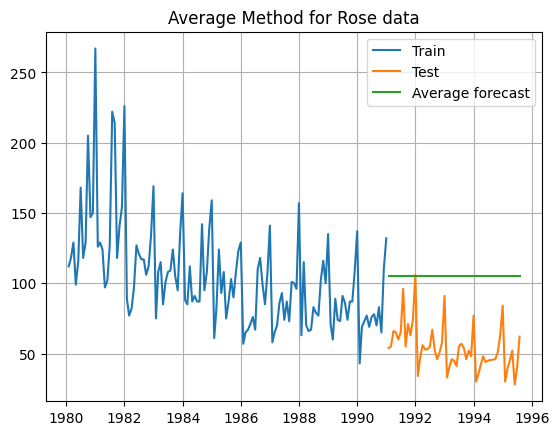

In [ ]:
plt.grid()
plt.plot(train_df1['Rose'], label='Train')
plt.plot(test_df1['Rose'], label='Test')
plt.plot(avg_test_df1['predict'], label='Average forecast')
plt.legend(loc='best')
plt.title('Average Method for Rose data')
plt.show()

In [ ]:
rmse_avg_rose = metrics.mean_squared_error(test_df1['Rose'],avg_test_df1['predict'],squared=False)
print("For Simple Average forecast on the Test Data of Rose wine,  RMSE is %.2f" %(rmse_avg_rose))

For Simple Average forecast on the Test Data of Rose wine,  RMSE is 53.46


In [ ]:
results_avg_rose = pd.DataFrame({'Test RMSE': [rmse_avg_rose]},index=['AverageForecast'])
results_df1 = pd.concat([results_df1,results_avg_rose])
results_df1

Test RMSE
RegresionOnTime  15.268958
NaiveForecast    79.718774
AverageForecast  53.460570

###4.Moving Average

For this model we are going to calcaulate the rolling means for different intervals and the best interval will have the maximum accuracy.

In [ ]:
Movavg_df1 = df1.copy()
Movavg_df1.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [ ]:
Movavg_df1['Trailing_2'] = Movavg_df1['Rose'].rolling(2).mean()
Movavg_df1['Trailing_4'] = Movavg_df1['Rose'].rolling(4).mean()
Movavg_df1['Trailing_6'] = Movavg_df1['Rose'].rolling(6).mean()
Movavg_df1['Trailing_9'] = Movavg_df1['Rose'].rolling(9).mean()
Movavg_df1.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

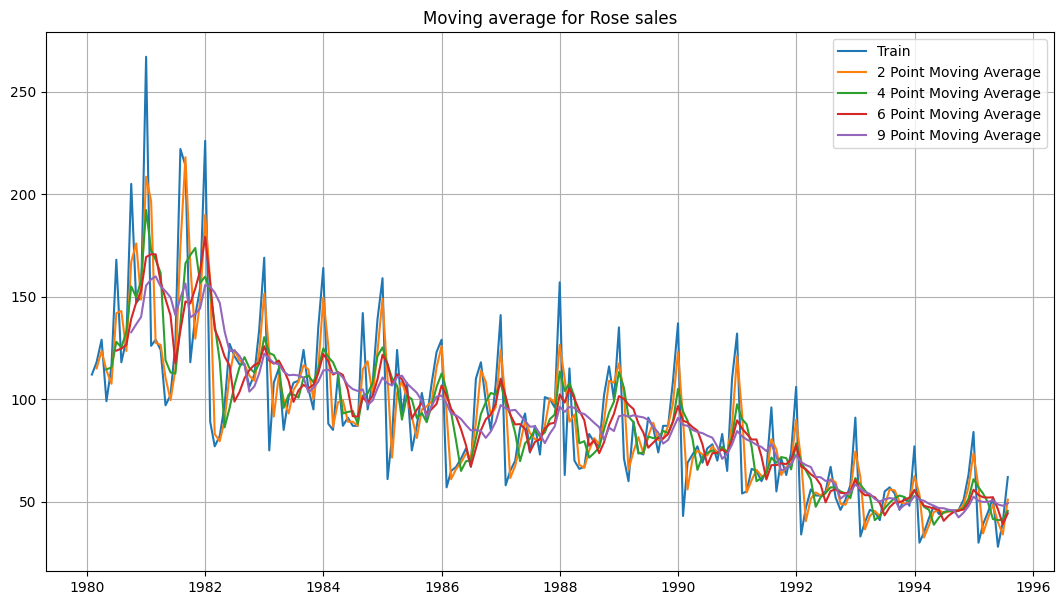

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(Movavg_df1['Rose'], label='Train')
plt.plot(Movavg_df1['Trailing_2'], label='2 Point Moving Average')
plt.plot(Movavg_df1['Trailing_4'], label='4 Point Moving Average')
plt.plot(Movavg_df1['Trailing_6'],label = '6 Point Moving Average')
plt.plot(Movavg_df1['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.title("Moving average for Rose sales")
plt.grid();

In [ ]:
MA_train_df1=Movavg_df1[Movavg_df1.index.year < 1991]
MA_test_df1=Movavg_df1[Movavg_df1.index.year >= 1991]

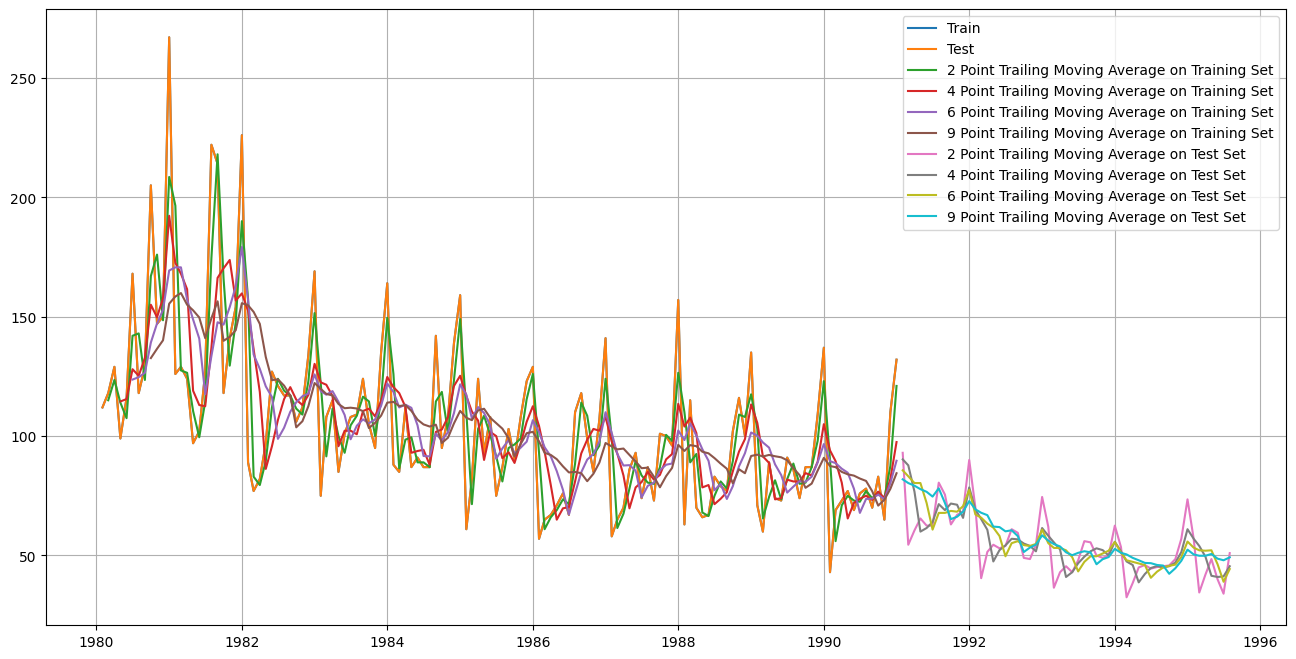

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(MA_train_df1['Rose'], label='Train')
plt.plot(MA_train_df1['Rose'], label='Test')

plt.plot(MA_train_df1['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MA_train_df1['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MA_train_df1['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MA_train_df1['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MA_test_df1['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MA_test_df1['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MA_test_df1['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MA_test_df1['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
rmse_model2_test_2_df2 = metrics.mean_squared_error(test_df1['Rose'],MA_test_df1['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %.2f" %(rmse_model2_test_2_df2))


rmse_model2_test_4_df2 = metrics.mean_squared_error(test_df1['Rose'],MA_test_df1['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %.2f" %(rmse_model2_test_4_df2))


rmse_model2_test_6_df2 = metrics.mean_squared_error(test_df1['Rose'],MA_test_df1['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %.2f" %(rmse_model2_test_6_df2))


rmse_model2_test_9_df2 = metrics.mean_squared_error(test_df1['Rose'],MA_test_df1['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %.2f " %(rmse_model2_test_9_df2))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.53
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.45
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.57
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.73 


In [ ]:
results2_df1 = pd.DataFrame({'Test RMSE': [rmse_model2_test_2_df2,rmse_model2_test_4_df2
                                          ,rmse_model2_test_6_df2,rmse_model2_test_9_df2]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_df1 = pd.concat([results_df1, results2_df1])
results_df1

Test RMSE
RegresionOnTime              15.268958
NaiveForecast                79.718774
AverageForecast              53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451395
6pointTrailingMovingAverage  14.566339
9pointTrailingMovingAverage  14.727631

###5.Simple Exponential Smoothing


In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [ ]:
SES_train_df1 = train_df1.copy()
SES_test_df1 = test_df1.copy()

In [ ]:
model_SES_df1 = SimpleExpSmoothing(SES_train_df1['Rose'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SES_autofit_df1 = model_SES_df1.fit(optimized=True)

In [ ]:
model_SES_autofit_df1.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test_df1['predict'] = model_SES_autofit_df1.forecast(steps=len(test_df1))
SES_test_df1.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104999
1991-02-28  55.0  87.104999
1991-03-31  66.0  87.104999
1991-04-30  65.0  87.104999
1991-05-31  60.0  87.104999

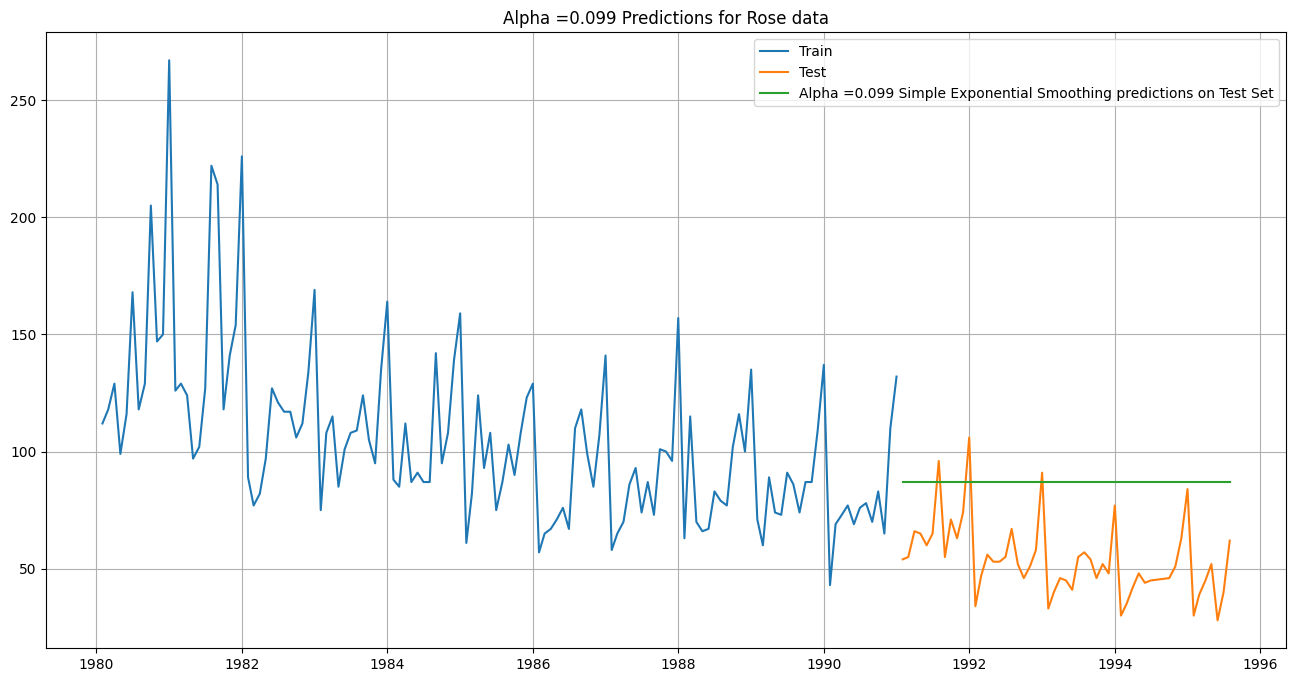

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_df1['Rose'], label='Train')
plt.plot(SES_test_df1['Rose'], label='Test')
plt.plot(SES_test_df1['predict'], label='Alpha =0.099 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.099 Predictions for Rose data');

In [ ]:
rmse_model3_test_1_df2 = metrics.mean_squared_error(SES_test_df1['Rose'],SES_test_df1['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data of Rose wine, RMSE is %.2f" %(rmse_model3_test_1_df2))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data of Rose wine, RMSE is 36.80


In [ ]:
results3_df1 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1_df2]}, index=['Alpha=0.099,SimpleExponentialSmoothing'])
results_df1 = pd.concat([results_df1, results3_df1])
results_df1

Test RMSE
RegresionOnTime                         15.268958
NaiveForecast                           79.718774
AverageForecast                         53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451395
6pointTrailingMovingAverage             14.566339
9pointTrailingMovingAverage             14.727631
Alpha=0.099,SimpleExponentialSmoothing  36.796243

Let us find the best alpha value

In [ ]:
resultsDf_df1 = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_df1

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES_df1.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_df1['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_df1['predict',i] = model_SES_alpha_i.forecast(steps=55)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test_df1['Rose'],SES_test_df1['predict',i],squared=False)
    resultsDf_df1 = resultsDf_df1.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

<ipython-input-400-c6a1d1ce3735>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_df1 = resultsDf_df1.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
<ipython-input-400-c6a1d1ce3735>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_df1 = resultsDf_df1.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
<ipython-input-400-c6a1d1ce3735>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_df1 = resultsDf_df1.append({'Alpha Values':i,'Test RMSE':rmse_model5_test_i}, ignore_index=True)
<ipython-input-400-c6a1d1ce3735>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [ ]:
resultsDf_df1.sort_values(by='Test RMSE', ascending=True)

Alpha Values  Test RMSE
0           0.3  47.504821
1           0.4  53.767406
2           0.5  59.641786
3           0.6  64.971288
4           0.7  69.698162
5           0.8  73.773993
6           0.9  77.139276

In [ ]:
results4_df1 = pd.DataFrame({'Test RMSE': [resultsDf_df1.sort_values(by='Test RMSE', ascending=True).values[0][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

results_df1 = pd.concat([results_df1, results4_df1])
results_df1

Test RMSE
RegresionOnTime                         15.268958
NaiveForecast                           79.718774
AverageForecast                         53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451395
6pointTrailingMovingAverage             14.566339
9pointTrailingMovingAverage             14.727631
Alpha=0.099,SimpleExponentialSmoothing  36.796243
Alpha=0.3,SimpleExponentialSmoothing    47.504821

###6.Double Exponential Smoothing - Holt's model

In [ ]:
DES_train_df1 = train_df1.copy()
DES_test_df1= test_df1.copy()

In [ ]:
model_DES_df1 = Holt(DES_train_df1['Rose'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_DES_autofit_df1 = model_DES_df1.fit(optimized=True)
model_DES_autofit_df1.params

{'smoothing_level': 5.271626142148799e-08,
 'smoothing_trend': 2.581003547020515e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81551886562906,
 'initial_trend': -0.49437754270808776,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
DES_test_df1['predict'] = model_DES_autofit_df1.forecast(steps=len(test_df1))
rmse_model3_test_3 = metrics.mean_squared_error(DES_test_df1['Rose'],DES_test_df1['predict'],squared=False)
print("For Alpha = 5.27e-08 and Beta = 2.58e-09 \nDouble Exponential Smoothing Model forecast on the Test Data, RMSE is %.2f" %(rmse_model3_test_3))

For Alpha = 5.27e-08 and Beta = 2.58e-09 
Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.27


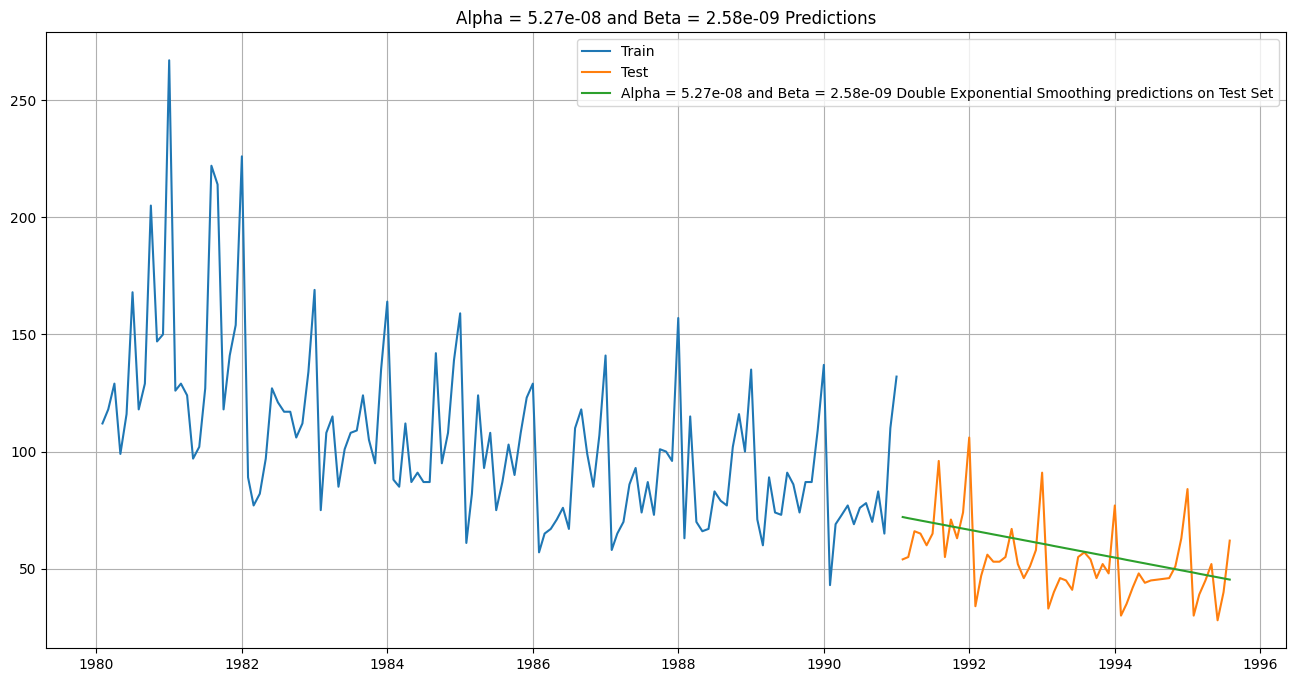

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(DES_train_df1['Rose'], label='Train')
plt.plot(DES_test_df1['Rose'], label='Test')
plt.plot(DES_test_df1['predict'], label='Alpha = 5.27e-08 and Beta = 2.58e-09 Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='upper right')
plt.grid()
plt.title('Alpha = 5.27e-08 and Beta = 2.58e-09 Predictions');

In [ ]:
results__7 = pd.DataFrame({'Test RMSE': [rmse_model3_test_3]}
                           ,index=['Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExponentialSmoothing'])

results_df1 = pd.concat([results_df1, results__7])
results_df1

Test RMSE
RegresionOnTime                                     15.268958
NaiveForecast                                       79.718774
AverageForecast                                     53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451395
6pointTrailingMovingAverage                         14.566339
9pointTrailingMovingAverage                         14.727631
Alpha=0.099,SimpleExponentialSmoothing              36.796243
Alpha=0.3,SimpleExponentialSmoothing                47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...  15.268973

In [ ]:
results5_df1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
results5_df1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model9 = model_DES_df1.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_df1['predict',i,j] = model9.fittedvalues
        DES_test_df1['predict',i,j] = model9.forecast(steps=55)
        rmse_model6_test1 = metrics.mean_squared_error(DES_test_df1['Rose'],DES_test_df1['predict',i,j],squared=False)
        results5_df1 = results5_df1.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test1}, ignore_index=True)

<ipython-input-410-e53ea0228954>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results5_df1 = results5_df1.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test1}, ignore_index=True)
<ipython-input-410-e53ea0228954>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results5_df1 = results5_df1.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test1}, ignore_index=True)
<ipython-input-410-e53ea0228954>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results5_df1 = results5_df1.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test1}, ignore_index=True)
<ipython-input-410-e53ea0228954>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

In [ ]:
results5_df1.sort_values(by=['Test RMSE'], ascending=True).head()

Alpha Values  Beta Values   Test RMSE
0            0.3          0.3  265.567592
8            0.4          0.3  339.306532
1            0.3          0.4  358.750940
16           0.5          0.3  394.272628
24           0.6          0.3  439.296031

In [ ]:
results6_df1 = pd.DataFrame({'Test RMSE': [results5_df1.sort_values(by=['Test RMSE'], ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

results_df1 = pd.concat([results_df1, results6_df1])
results_df1

Test RMSE
RegresionOnTime                                      15.268958
NaiveForecast                                        79.718774
AverageForecast                                      53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592

###7.Triple Exponential Smoothing - Holt Winter's model

In [ ]:
TES_train_df1 = train_df1.copy()
TES_test_df1 = test_df1.copy()

In [ ]:
model_TES_df1 = ExponentialSmoothing(TES_train_df1['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [ ]:
model_TES_autofit_df1 = model_TES_df1.fit()

In [ ]:
TES_test_df1['auto_predict'] = model_TES_autofit_df1.forecast(steps=len(test_df1))
TES_test_df1.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     55.942246
1991-02-28  55.0     63.240624
1991-03-31  66.0     68.899674
1991-04-30  65.0     60.007486
1991-05-31  60.0     67.257150

In [ ]:
model_TES_autofit_df1.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

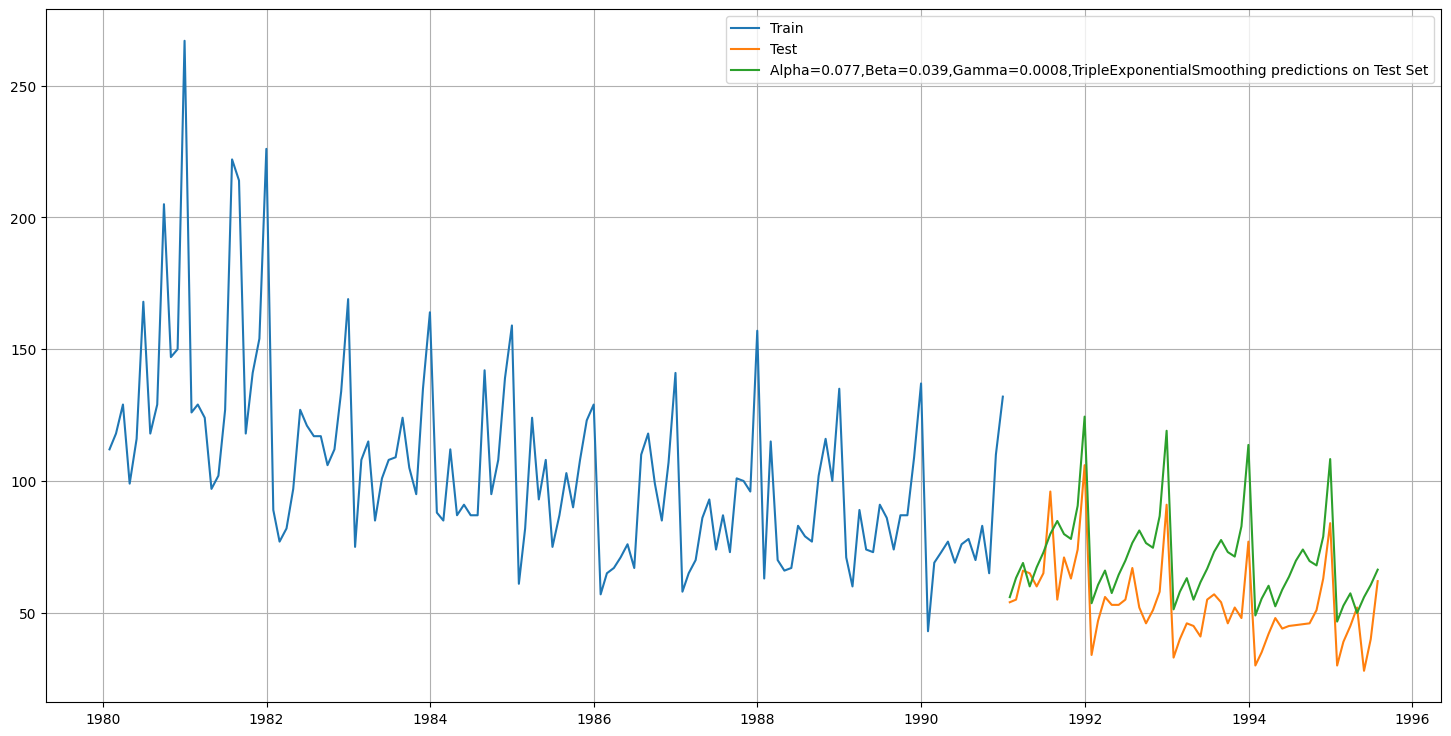

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_df1['Rose'], label='Train')
plt.plot(TES_test_df1['Rose'], label='Test')

plt.plot(TES_test_df1['auto_predict'], label='Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
rmse_model6_test_1_df1 = metrics.mean_squared_error(TES_test_df1['Rose'],TES_test_df1['auto_predict'],squared=False)
print("For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %.2f"
      %(rmse_model6_test_1_df1))

For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 19.11


In [ ]:
results7_df1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1_df1]}
                           ,index=['Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExponentialSmoothing'])

results_df1= pd.concat([results_df1, results7_df1])
results_df1

Test RMSE
RegresionOnTime                                      15.268958
NaiveForecast                                        79.718774
AverageForecast                                      53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098

In [ ]:
results8_df1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
results8_df1

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_df1.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_df1['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_df1['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
            rmse_model8_test = metrics.mean_squared_error(TES_test_df1['Rose'],TES_test_df1['predict',i,j,k],squared=False)

            results8_df1= results8_df1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

<ipython-input-422-b8affb08166d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results8_df1= results8_df1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
<ipython-input-422-b8affb08166d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results8_df1= results8_df1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
<ipython-input-422-b8affb08166d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results8_df1= results8_df1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_model8_test}
<ipython-input-422-b8affb08166d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [ ]:
results8_df1.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Test RMSE
1             0.3          0.3           0.4  10.164042
9             0.3          0.4           0.4  10.371796
80            0.4          0.5           0.3  13.393929
24            0.3          0.6           0.3  15.485464
194           0.6          0.3           0.5  17.245996

In [ ]:
model_2= model_TES_df1.fit(smoothing_level=0.3,smoothing_trend=0.3,smoothing_seasonal=0.4,optimized=False,use_brute=True)
TES_train_df1['predict'] = model_2.fittedvalues
TES_test_df1['predict'] = model_2.forecast(steps=55)

<ipython-input-424-58a3964b185c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train_df1['predict'] = model_2.fittedvalues
<ipython-input-424-58a3964b185c>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test_df1['predict'] = model_2.forecast(steps=55)


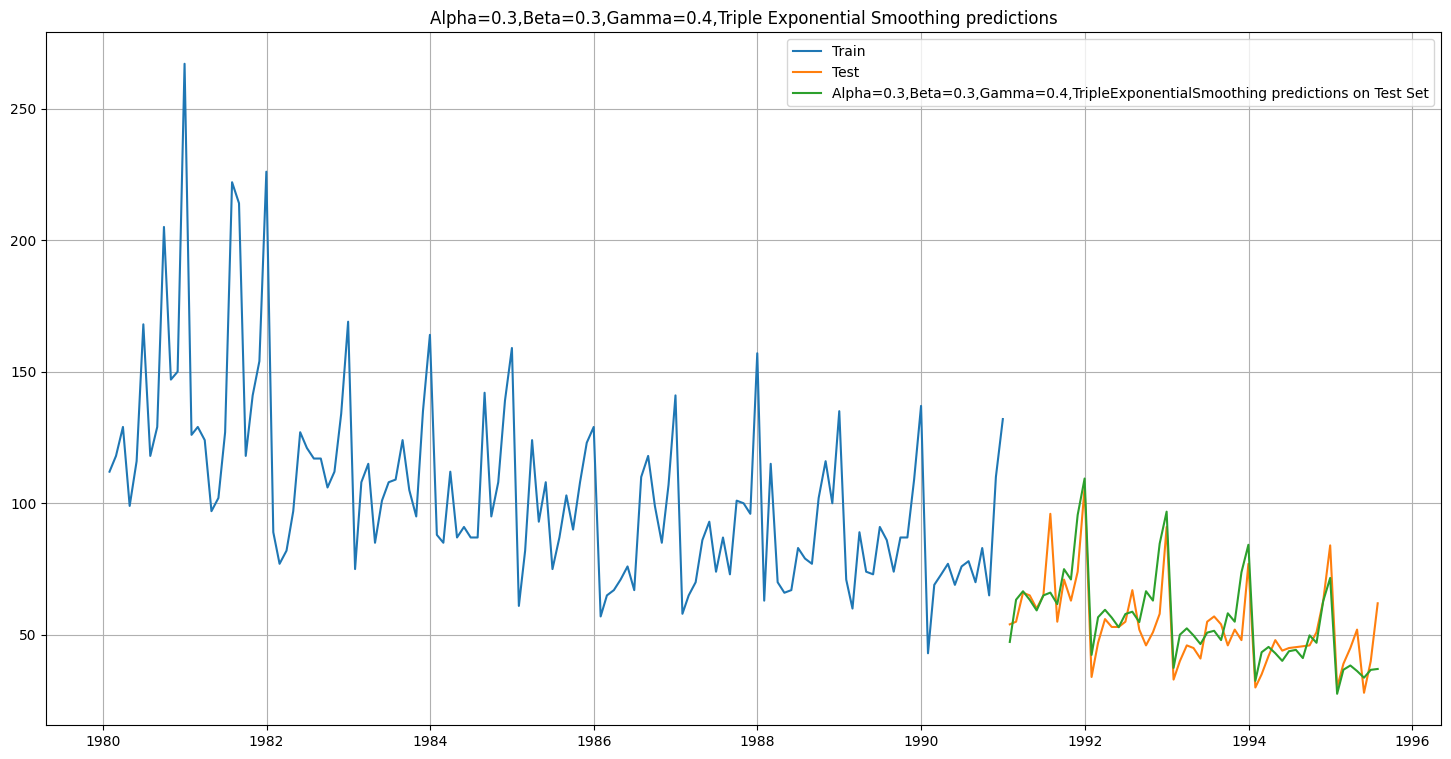

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train_df1['Rose'], label='Train')
plt.plot(TES_test_df1['Rose'], label='Test')

plt.plot(TES_test_df1['predict'], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')

plt.title("Alpha=0.3,Beta=0.3,Gamma=0.4,Triple Exponential Smoothing predictions")
plt.legend(loc='best')
plt.grid();

In [ ]:
results9_df1 = pd.DataFrame({'Test RMSE': [results8_df1.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

results_df1= pd.concat([results_df1, results9_df1])
results_df1

Test RMSE
RegresionOnTime                                      15.268958
NaiveForecast                                        79.718774
AverageForecast                                      53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.164042

In [ ]:
print('Sorted by RMSE values on the Test Data for Rose sales:','\n',)
results_df1.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data for Rose sales: 



Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.164042
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
RegresionOnTime                                      15.268958
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
AverageForecast                                      53.460570
NaiveForecast                                        79.718774
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592

For this data, we had both trend and seasonality so Triple Exponential Smoothing works better than the Simple Exponential Smoothing and Double Exponential Smoothing.

Hence the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.4.


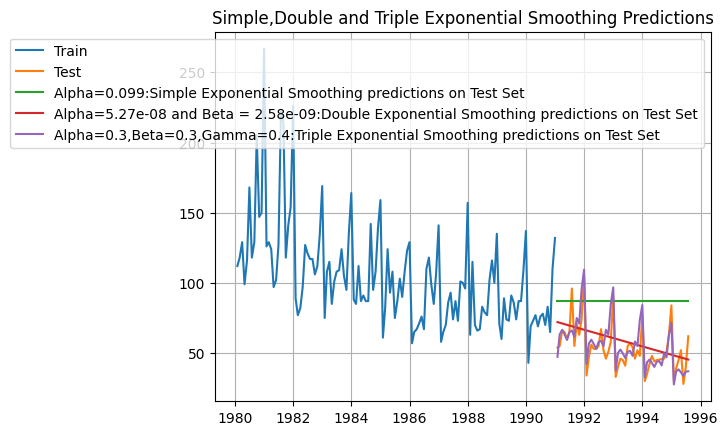

In [ ]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_test_df1['predict'], label='Alpha=0.099:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test_df1['predict'], label='Alpha=5.27e-08 and Beta = 2.58e-09:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test_df1['predict'], label='Alpha=0.3,Beta=0.3,Gamma=0.4:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

##5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [ ]:
from statsmodels.tsa.stattools import adfuller

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

Null Hypothesis  𝐻0 : Time Series is non-stationary.
Alternate Hypothesis  𝑯𝒂 : Time Series is stationary.


So if p-value < 0.05 then null hypothesis(Time series is non-stationary) is rejected else the Time series is non-stationary is failed to be rejected .

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

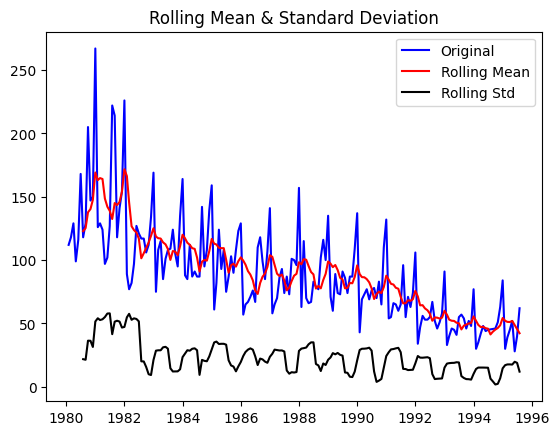

Results of Dickey-Fuller Test:
Test Statistic                  -1.876710
p-value                          0.343096
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [ ]:
test_stationarity(df1['Rose'])

Since the p-value is 0.343 at 5% critical value, which is greater than 0.05, the null hypothesis is not rejected. Hence the time series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

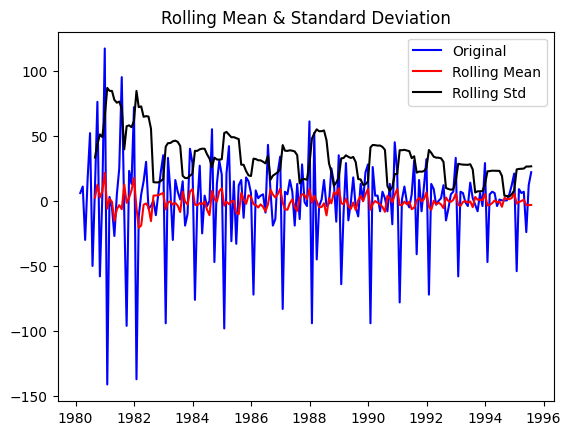

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810897e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [ ]:
test_stationarity(df1['Rose'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is  stationary.

##6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

###1.ARIMA model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model are:')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model are:
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
ARIMA_AIC_df1 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_df1

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    ARIMA_model_df1 = ARIMA(train_df1['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_df1.aic))
    ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.309831974832
ARIMA(0, 1, 2) - AIC:1279.6715288535784
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380046


<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)
<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)
<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)
<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1

ARIMA(1, 1, 2) - AIC:1279.8707234231929
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.5078621868563
ARIMA(2, 1, 2) - AIC:1281.870722226456


<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)
<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)
<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1 = ARIMA_AIC_df1.append({'param':param, 'AIC': ARIMA_model_df1.aic}, ignore_index=True)
<ipython-input-435-6d403230e9ca>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_df1

In [ ]:
ARIMA_AIC_df1.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [ ]:
auto_ARIMA_df1 = ARIMA(train_df1['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA_df1 = auto_ARIMA_df1.fit()

print(results_auto_ARIMA_df1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 11 Jun 2023   AIC                           1279.672
Time:                        10:01:43   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
predicted_auto_ARIMA_df1 = results_auto_ARIMA_df1.forecast(steps=len(test_df1))

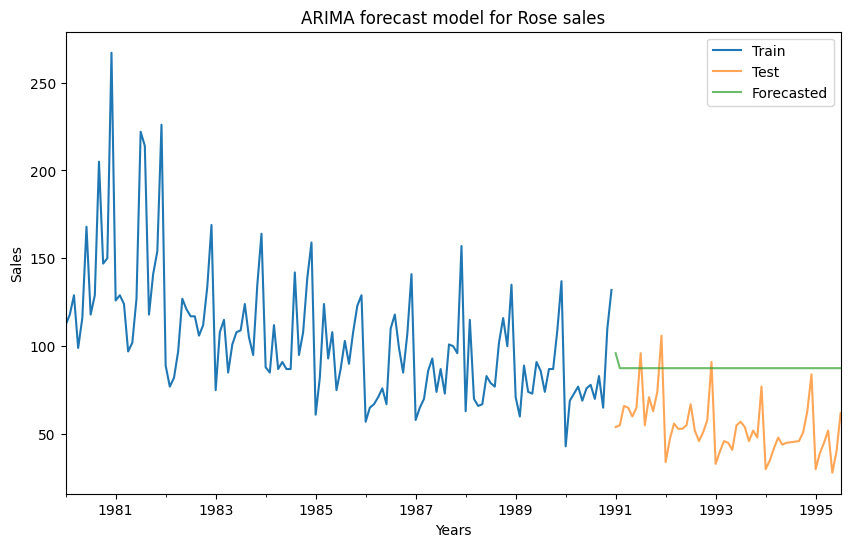

In [ ]:
axis = train_df1['Rose'].plot(label='Train', figsize=(10, 6))
test_df1['Rose'].plot(ax=axis, label='Test', alpha=0.7)
predicted_auto_ARIMA_df1.plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("ARIMA forecast model for Rose sales")
plt.show()
plt.close()

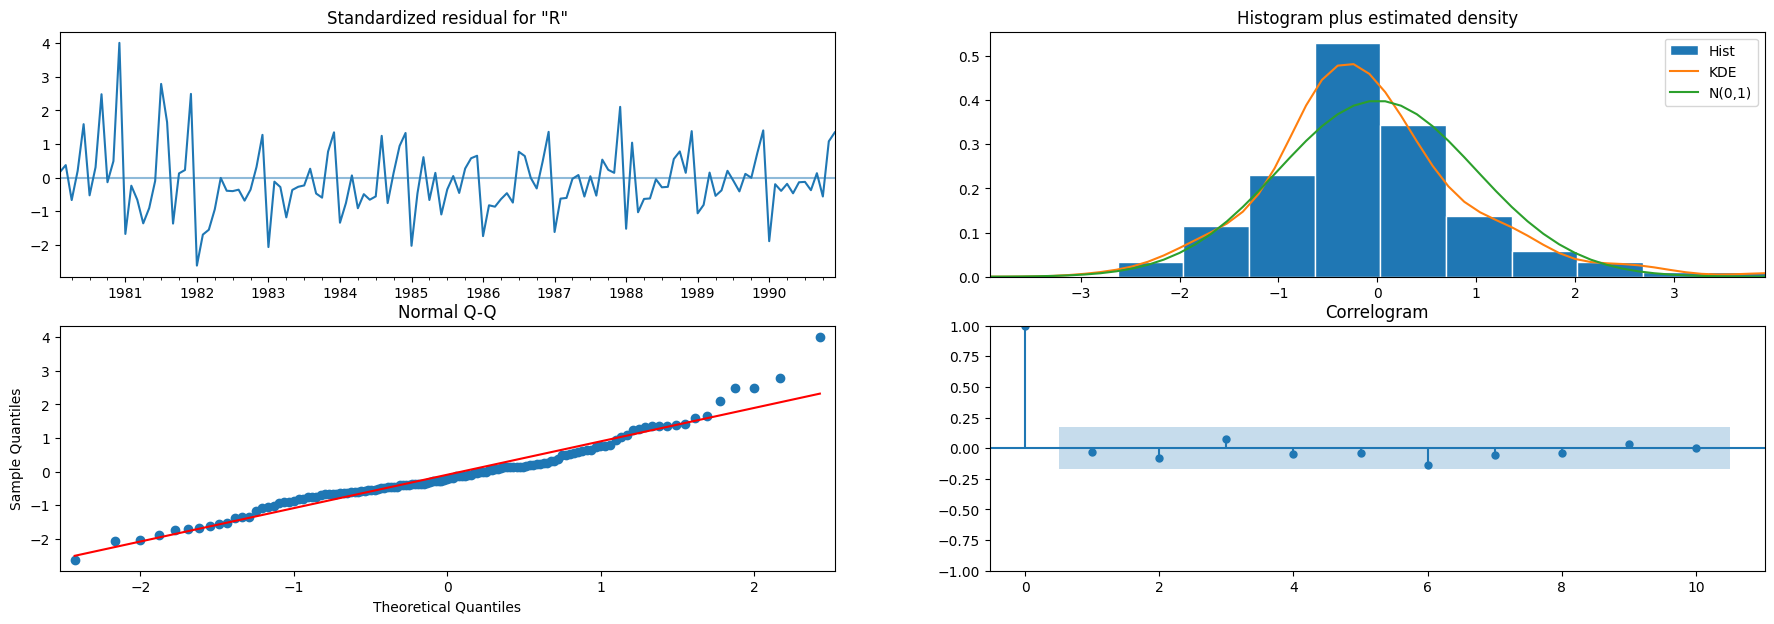

In [ ]:

results_auto_ARIMA_df1.plot_diagnostics(figsize=(22,7))
plt.show()

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse_arima_df1 = mean_squared_error(test_df1['Rose'],predicted_auto_ARIMA_df1,squared=False)
print(rmse_arima_df1)

37.30648026600374


In [ ]:
results10_df1 = pd.DataFrame({'Test RMSE': [rmse_arima_df1]}
                           ,index=['ARIMA(0,1,2)'])


results_df1 = pd.concat([results_df1,results10_df1])
results_df1

Test RMSE
RegresionOnTime                                      15.268958
NaiveForecast                                        79.718774
AverageForecast                                      53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.164042
ARIMA(0,1,2)                                         37.306480

###2.SARIMA model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model are:')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model are:
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC_df1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_df1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_df1 = sm.tsa.statespace.SARIMAX(train_df1['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA_df1 = SARIMA_model_df1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_df1.aic))
        SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207298


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386172


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575225
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697556


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945757
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938385
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491823


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946953


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483297299


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535833


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.333243046168


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988272651953
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264943


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617706
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341428


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933510634


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913555999


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257989


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545018613


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085678423
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585693


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257691
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680456
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055025265


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.500197294866
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663985


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103070971
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255503
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640795


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063874
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031748


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135254


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428506896


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060840378


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470819


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936852
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.949504070617
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101097


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402541679


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922460045


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.618321201544


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318501450825


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196871572


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597829767667


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869288410242
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704711108


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829944
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575928
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641114


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559369
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645402


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384027


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280808
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231795724


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949427


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472070228
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101224


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.924447120564


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822521


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608071731


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369443


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866281226
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.910211614671


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)
<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598227


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311112158


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713679516


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354304648


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.666148880164


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464452657485


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889515104


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980928464


<ipython-input-446-7b6b9a691747>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_df1 = SARIMA_AIC_df1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_df1.aic}, ignore_index=True)


In [ ]:
SARIMA_AIC_df1.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686929
78  (2, 1, 2)  (2, 0, 0, 12)  897.346445

In [ ]:
import statsmodels.api as sm

auto_SARIMA_df1= sm.tsa.statespace.SARIMAX(train_df1['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_df1 = auto_SARIMA_df1.fit(maxiter=1000)
print(results_auto_SARIMA_df1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 11 Jun 2023   AIC                            887.938
Time:                                    10:02:12   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.534     -0.004      0.996    -372.322     370.636
ma.L2         -0.1573     29.777   

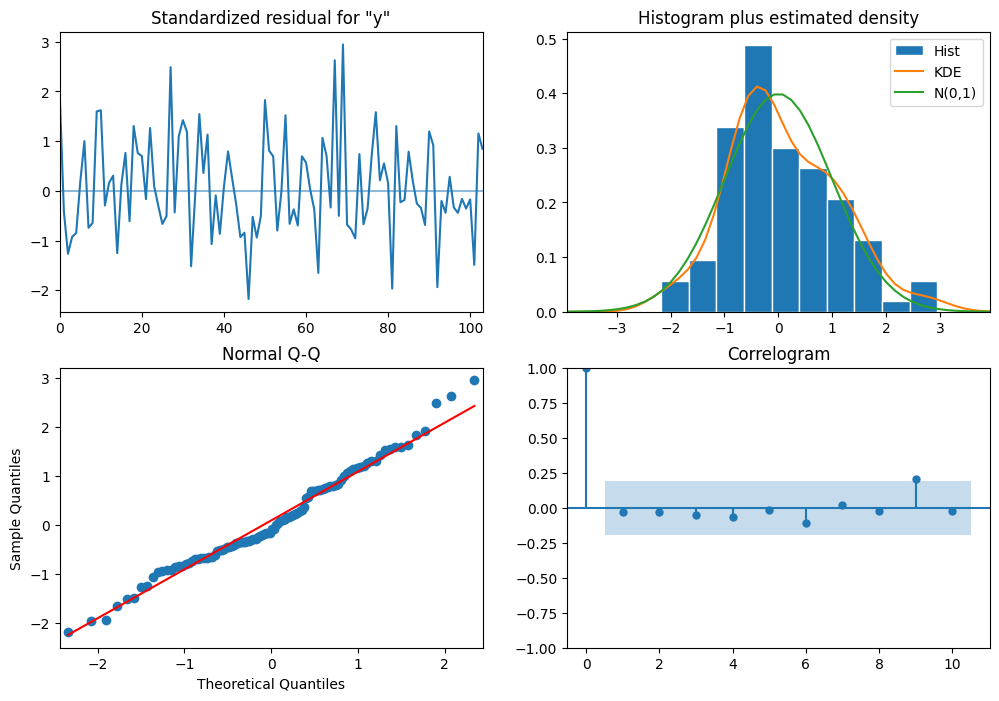

In [ ]:
results_auto_SARIMA_df1.plot_diagnostics(figsize=(12,8))
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

In [ ]:
predicted_auto_SARIMA_df1 = results_auto_SARIMA_df1.get_forecast(steps=len(test_df1))

In [ ]:
predicted_auto_SARIMA_df1.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867262  15.928500      31.647975      94.086548
1  70.541189  16.147658      38.892361     102.190017
2  77.356410  16.147656      45.707587     109.005233
3  76.208813  16.147656      44.559990     107.857637
4  72.747397  16.147656      41.098574     104.396221

In [ ]:
testcopy3 = test_df1.copy()
testcopy3['forecasted'] = predicted_auto_SARIMA_df1.predicted_mean

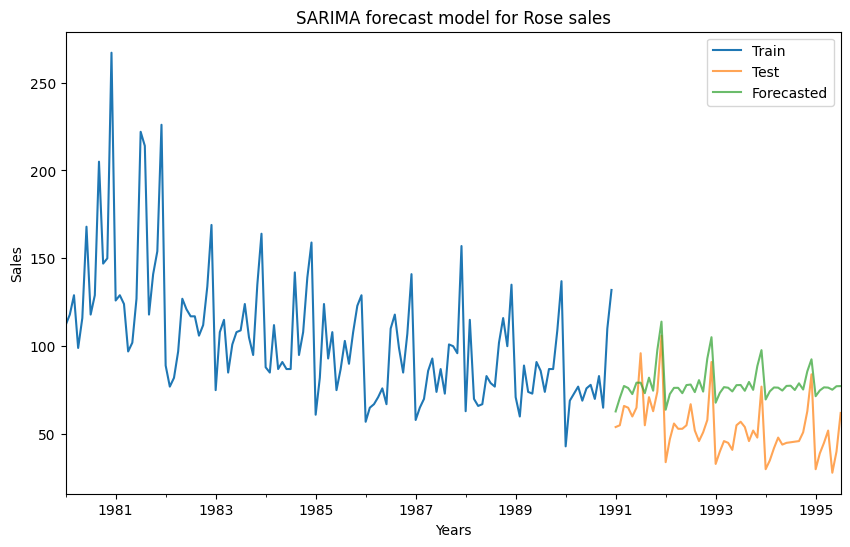

In [ ]:
axis = train_df1['Rose'].plot(label='Train', figsize=(10, 6))
testcopy3['Rose'].plot(ax=axis, label='Test', alpha=0.7)
testcopy3['forecasted'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("SARIMA forecast model for Rose sales")
plt.show()
plt.close()

In [ ]:
rmse_sarima_df1 = mean_squared_error(test_df1['Rose'],predicted_auto_SARIMA_df1.predicted_mean,squared=False)
print(rmse_sarima_df1)

26.928367334275265


In [ ]:
results_sarima_df1 = pd.DataFrame({'Test RMSE': [rmse_sarima_df1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

results_df1 = pd.concat([results_df1,results_sarima_df1])

results_df1

Test RMSE
RegresionOnTime                                      15.268958
NaiveForecast                                        79.718774
AverageForecast                                      53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.164042
ARIMA(0,1,2)                                         37.306480
SARIMA(0,1,2)(2,0,2,12)                              26.928367

##7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
results_df1

Test RMSE
RegresionOnTime                                      15.268958
NaiveForecast                                        79.718774
AverageForecast                                      53.460570
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
Alpha=0.099,SimpleExponentialSmoothing               36.796243
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.164042
ARIMA(0,1,2)                                         37.306480
SARIMA(0,1,2)(2,0,2,12)                              26.928367

In [ ]:

results_df1.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.164042
2pointTrailingMovingAverage                          11.529278
4pointTrailingMovingAverage                          14.451395
6pointTrailingMovingAverage                          14.566339
9pointTrailingMovingAverage                          14.727631
RegresionOnTime                                      15.268958
Alpha = 5.27e-08 and Beta = 2.58e-09,DoubleExpo...   15.268973
Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExpon...   19.113098
SARIMA(0,1,2)(2,0,2,12)                              26.928367
Alpha=0.099,SimpleExponentialSmoothing               36.796243
ARIMA(0,1,2)                                         37.306480
Alpha=0.3,SimpleExponentialSmoothing                 47.504821
AverageForecast                                      53.460570
NaiveForecast                                        79.718774
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.567592

###1.TES - alpha = 0.3, beta = 0.3, gamma = 0.4 forecast

In [ ]:
model7_df1 = ExponentialSmoothing(df1,trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.4)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel7_df1 = metrics.mean_squared_error(df1['Rose'],model7_df1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel7_df1)

RMSE: 21.01323616895947


In [ ]:
prediction_7_df1 = model7_df1.forecast(steps=12)

In [ ]:
prediction_7_df1

1995-08-31    43.173086
1995-09-30    40.142911
1995-10-31    41.563025
1995-11-30    46.296014
1995-12-31    64.193298
1996-01-31    23.552862
1996-02-29    29.635571
1996-03-31    34.889037
1996-04-30    38.055291
1996-05-31    28.514684
1996-06-30    35.436296
1996-07-31    38.113142
Freq: M, dtype: float64

In [ ]:
df1.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  89.914439  39.238325  28.0  62.5  85.0  111.0  267.0

In [ ]:
prediction_7_df1.describe()

count    12.000000
mean     38.630435
std      10.353360
min      23.552862
25%      33.575671
50%      38.084216
75%      41.965540
max      64.193298
dtype: float64

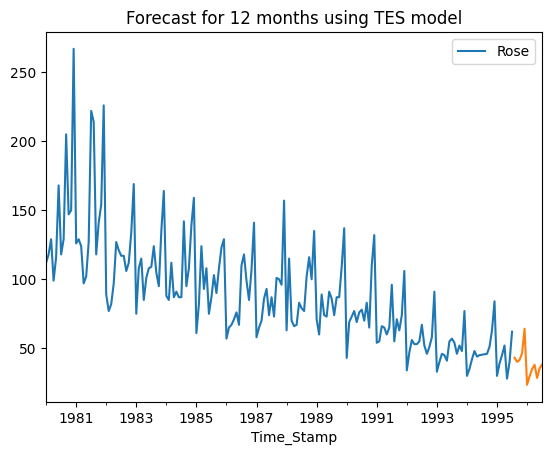

In [ ]:
df1.plot()
prediction_7_df1.plot()
plt.title("Forecast for 12 months using TES model")
plt.show()

In [ ]:
pred_7_df1 = pd.DataFrame({'lower_CI':prediction_7_df1 - 1.96*np.std(model7_df1.resid,ddof=1),
                          'prediction':prediction_7_df1,
                          'upper_ci': prediction_7_df1 + 1.96*np.std(model7_df1.resid,ddof=1)})
pred_7_df1.head(12)

lower_CI  prediction    upper_ci
1995-08-31   1.910684   43.173086   84.435487
1995-09-30  -1.119490   40.142911   81.405313
1995-10-31   0.300624   41.563025   82.825426
1995-11-30   5.033612   46.296014   87.558415
1995-12-31  22.930897   64.193298  105.455700
1996-01-31 -17.709539   23.552862   64.815264
1996-02-29 -11.626830   29.635571   70.897973
1996-03-31  -6.373364   34.889037   76.151438
1996-04-30  -3.207111   38.055291   79.317692
1996-05-31 -12.747717   28.514684   69.777085
1996-06-30  -5.826105   35.436296   76.698697
1996-07-31  -3.149259   38.113142   79.375543

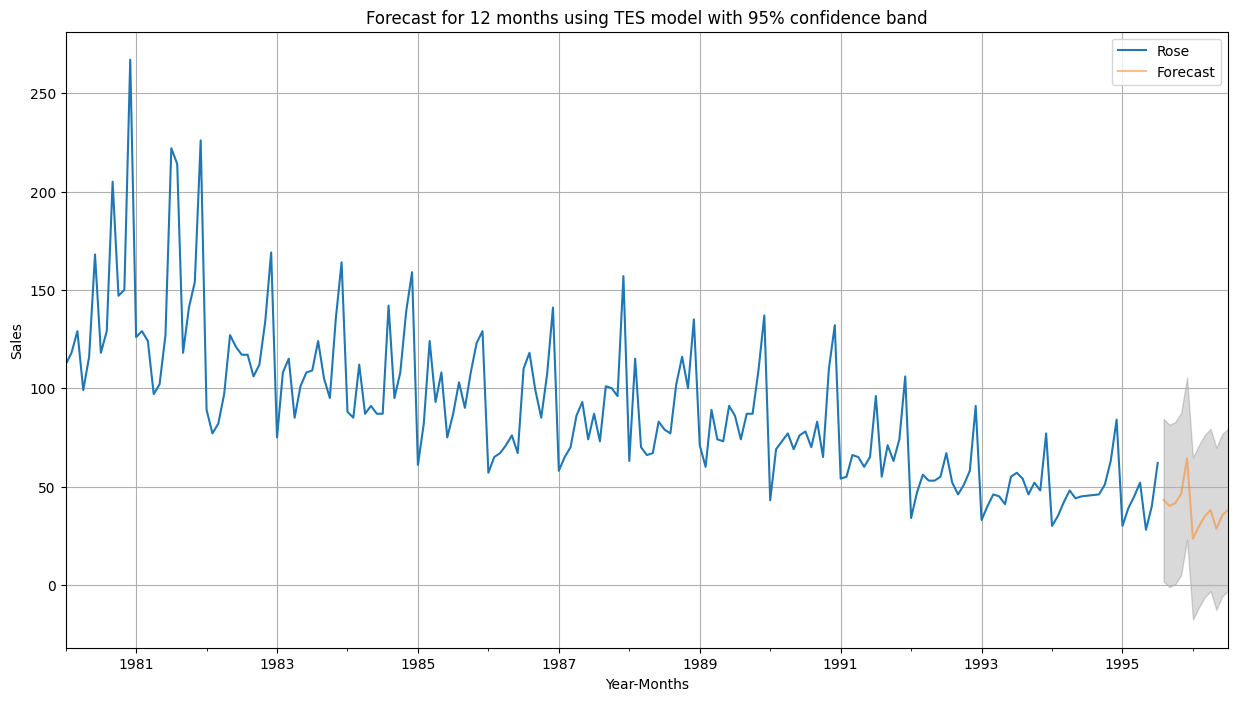

In [ ]:
axis = df1.plot(label='Actual', figsize=(15,8))
pred_7_df1['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_7_df1.index, pred_7_df1['lower_CI'], pred_7_df1['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title("Forecast for 12 months using TES model with 95% confidence band")
plt.show()

###4.ARIMA (0,1,2) forecast

In [ ]:
arima_df1 = ARIMA(df1['Rose'], order=(0,1,2),freq='M')

model8_df1= arima_df1.fit()

print(model8_df1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -882.813
Date:                Sun, 11 Jun 2023   AIC                           1771.626
Time:                        10:02:15   BIC                           1781.304
Sample:                    01-31-1980   HQIC                          1775.548
                         - 07-31-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7108      0.055    -12.828      0.000      -0.819      -0.602
ma.L2         -0.1751      0.059     -2.991      0.003      -0.290      -0.060
sigma2       770.5374     54.260     14.201      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
rmse_8_df1 = mean_squared_error(df1['Rose'],model8_df1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_8_df1)

RMSE of the Full Model 28.97570088993685


In [ ]:
pred_8_df1= model8_df1.get_forecast(steps=12)

In [ ]:
pred_8_df1.summary_frame(alpha=0.05)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  51.346756  27.758555      -3.059012     105.752524
1995-09-30  48.581748  28.896196      -8.053755     105.217251
1995-10-31  48.581748  29.069236      -8.392907     105.556403
1995-11-30  48.581748  29.241252      -8.730053     105.893549
1995-12-31  48.581748  29.412262      -9.065226     106.228722
1996-01-31  48.581748  29.582284      -9.398462     106.561958
1996-02-29  48.581748  29.751333      -9.729794     106.893290
1996-03-31  48.581748  29.919428     -10.059254     107.222750
1996-04-30  48.581748  30.086584     -10.386873     107.550368
1996-05-31  48.581748  30.252816     -10.712682     107.876177
1996-06-30  48.581748  30.418139     -11.036710     108.200206
1996-07-31  48.581748  30.582569     -11.358987     108.522482

In [ ]:
pred_8_df1 = pred_8_df1.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

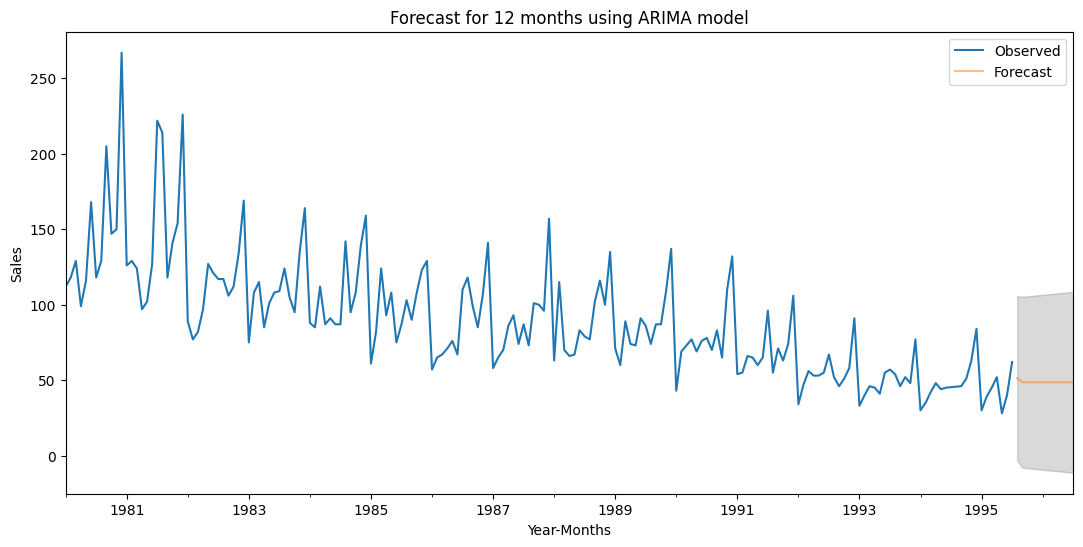

In [ ]:
plt.figure(figsize=(13,6))
axis = df1['Rose'].plot(label='Observed')
pred_8_df1['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_8_df1.index, pred_8_df1['mean_ci_lower'],
                  pred_8_df1['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Forecast for 12 months using ARIMA model")
plt.show()



###5.SARIMA (0,1,2)(2,0,2,12) forecast

In [ ]:
data_model_df1 = sm.tsa.statespace.SARIMAX(df1['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_data_model_df1 = data_model_df1.fit(maxiter=1000)
print(results_data_model_df1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -647.342
Date:                            Sun, 11 Jun 2023   AIC                           1308.685
Time:                                    10:02:24   BIC                           1330.167
Sample:                                01-31-1980   HQIC                          1317.409
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7659      0.088     -8.744      0.000      -0.938      -0.594
ma.L2         -0.1386      0.081   

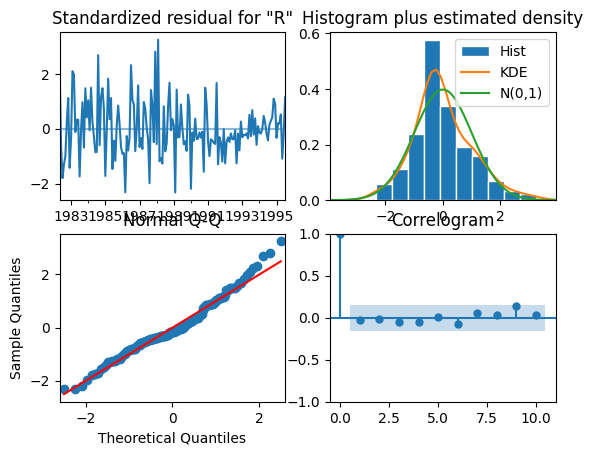

In [ ]:
results_data_model_df1.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_data_df1= results_data_model_df1.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_data_df1.summary_frame(alpha=0.05)

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  47.417244  14.114188      19.753943      75.080545
1995-09-30  44.099636  14.495674      15.688637      72.510634
1995-10-31  47.205511  14.558113      18.672133      75.738889
1995-11-30  52.523952  14.620286      23.868718      81.179187
1995-12-31  69.618594  14.682196      40.842019      98.395170
1996-01-31  32.380118  14.743846       3.482712      61.277524
1996-02-29  37.869155  14.805238       8.851421      66.886889
1996-03-31  42.325472  14.866378      13.187907      71.463038
1996-04-30  46.157778  14.927267      16.900873      75.414683
1996-05-31  35.269280  14.987908       5.893519      64.645040
1996-06-30  41.334583  15.048306      11.840446      70.828720
1996-07-31  51.114907  15.108462      21.502866      80.726947

In [ ]:
rmse_full_df1 = mean_squared_error(df1['Rose'],results_data_model_df1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_full_df1)

RMSE of the Full Model 27.675112996266


In [ ]:
pred_manual_SARIMA_date_df1= predicted_manual_SARIMA_data_df1.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

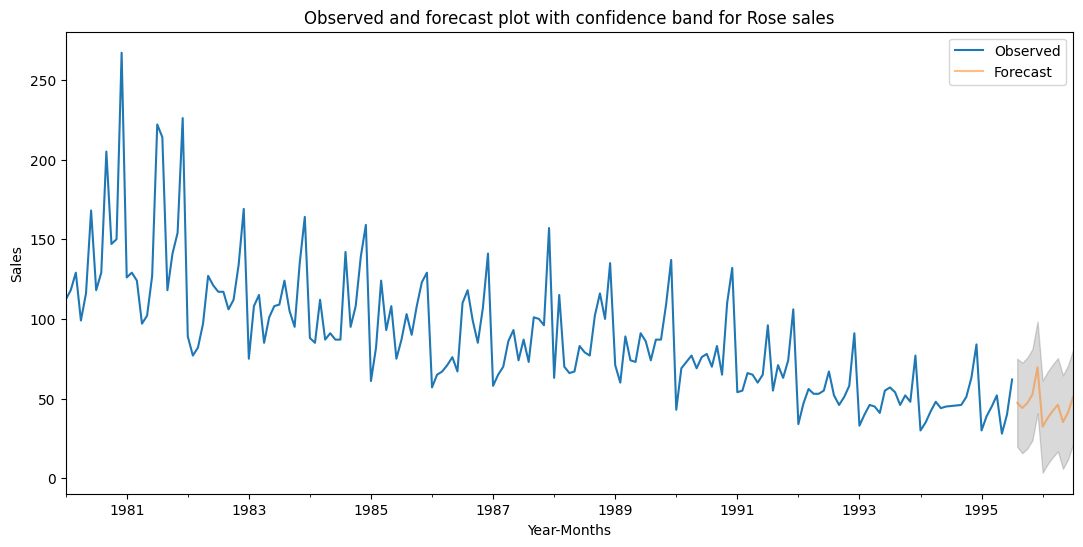

In [ ]:
plt.figure(figsize=(13,6))
axis = df1['Rose'].plot(label='Observed')
pred_manual_SARIMA_date_df1['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_manual_SARIMA_date_df1.index, pred_manual_SARIMA_date_df1['mean_ci_lower'],
                  pred_manual_SARIMA_date_df1['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Observed and forecast plot with confidence band for Rose sales")
plt.show()